12.0	11.879663066529057	11.76064258556331	11.642924155479353	11.526493532203514	11.411336627488321	11.297439507207807	11.184788389671448	11.073369643956582	10.963169788259034	10.854175488261811	10.74637355552163	10.639750945873105	10.534294757850377	10.42999223112603	10.326830744967074	10.224797816707813	10.123881100239442	10.024068384516141	9.925347592077525	9.827706777587263	9.73113412638767	9.635617953070124	9.541146700061116	9.447708936223767	9.355293355474654	9.263888775415747	9.173484135981338	9.084068498099755	8.99563104236972	8.908161067751188	8.821647990270506	8.73608134173975	8.651450768490044	8.567746030118773	8.484956998250464	8.40307365531125	8.322086093316734	8.241984512673099	8.162759220991358	8.084400631914555	8.006899263957807	7.930245739361035	7.854430782954236	7.7794452210351865	7.705279980259402	7.631926086542263	7.559374663973131	7.4876169337413545	7.416644213074027	7.346447914185353	7.277019543237523	7.208350699312941	7.1404330733977135	7.0732584473762365	7.006818

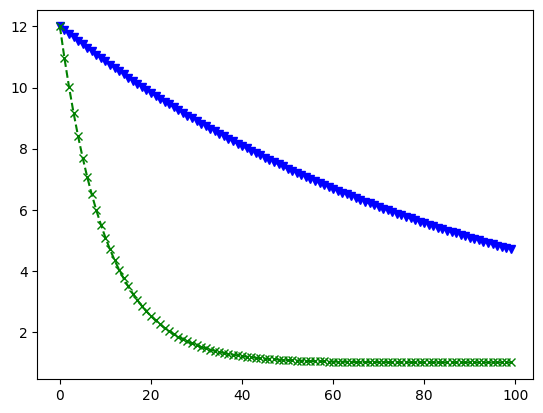

In [25]:
# -*- coding: utf-8 -*-

import math
import matplotlib
#matplotlib.use('pdf')
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(suppress=True)




class MonotonicExponentialLR:
    def __init__(self, max_lr, min_lr, total_steps, gamma, last_epoch=-1):
        self.max_lr = max_lr
        self.min_lr = min_lr
        self.total_steps = total_steps
        self.gamma = gamma
        self.current_step = 0
        self.last_epoch = last_epoch

    def step(self):
        if self.last_epoch > self.total_steps:
            lr = self.min_lr
        else:
            lr = self.min_lr + (self.max_lr - self.min_lr) * math.exp(-self.gamma * self.current_step / self.total_steps)
            self.current_step += 1
            lr = max(lr, self.min_lr)
        return lr



# 使用示例

total_steps = 100  # 假設總訓練步驟是100
scheduler = MonotonicExponentialLR(max_lr=12, min_lr=1, total_steps=total_steps, gamma=1.1)

num_epochs = 100
LR1 = []
for epoch in range(num_epochs):
    # 訓練模型...
    lr = scheduler.step()
    print( lr , end='\t' )
    LR1.append(lr)


scheduler = MonotonicExponentialLR(max_lr=12, min_lr=1, total_steps=total_steps, gamma=9.9)

num_epochs = 100
LR2 = []
for epoch in range(num_epochs):
    # 訓練模型...
    lr = scheduler.step()
    print( lr , end='\t' )
    LR2.append(lr)



plt.plot(range(len(LR1)), LR1, 'v--b')
plt.plot(range(len(LR2)), LR2, 'x--g')




